<a href="https://colab.research.google.com/github/StevenPeutz/Masterthesis-Disinformation-NLP/blob/master/LexicalDistanceMetrics/LexicalDistance_NoiseProxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lexical Distances as proxy for MT induced noise.
This notebook contains the code to calculate lexical distances between (back)translated versions of the texts (corpus).  
Results are exported as csv's, which can be be found within this same folder.

# Imports, installations and mounting.

In [1]:
!pip install textdistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import textdistance

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Calculating the actual lexical noise per back-translation
- Jaro Winkler Distance (edit based)
- Hamming Distance (edit based)
- Ratcliff Obershelp (sequence based)
- longest common substring (sequence based)
- levenshtein distance (edit-based)

In [4]:
df_test = pd.read_csv('/content/drive/MyDrive/MYDATA/full_TEST01_NX.csv')

In [5]:
df_test.sample()

,text,label,text_N1,text_N2,text_N3
10529,Turkey s on-going visa crisis with the United ...,0,Turkey's ongoing visa crisis with the United S...,Turkey's ongoing visa crisis with the United S...,Turkey's ongoing visa crisis with the United S...


# JaroWinkler Distance

In [ ]:
df_JaroWinkler_distance = pd.DataFrame()

In [ ]:
#distances from each other, instead of its distances from the original (N0)
"""
df_JaroWinkler_distance['N0_N1_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text'], x['text_N1']), axis = 1)
df_JaroWinkler_distance['N1_N2_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text_N1'], x['text_N2']), axis = 1)
df_JaroWinkler_distance['N2_N3_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text_N2'], x['text_N3']), axis = 1)
"""

"\ndf_JaroWinkler_distance['N0_N1_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text'], x['text_N1']), axis = 1)\ndf_JaroWinkler_distance['N1_N2_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text_N1'], x['text_N2']), axis = 1)\ndf_JaroWinkler_distance['N2_N3_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text_N2'], x['text_N3']), axis = 1)\n"

In [ ]:
#distances from the original (N0)
df_JaroWinkler_distance['N0_N1_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text'], x['text_N1']), axis = 1)
df_JaroWinkler_distance['N0_N2_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text'], x['text_N2']), axis = 1)
df_JaroWinkler_distance['N0_N3_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text'], x['text_N3']), axis = 1)

In [ ]:
#export the JaroWinkel results as a seperate df
df_JaroWinkler_distance.to_csv('/content/drive/MyDrive/MYDATA/LexicalDistance/LexicalDistanceJW_base.csv', index=False)

In [ ]:
display(df_JaroWinkler_distance.describe())

,N0_N1_distance,N0_N2_distance,N0_N3_distance
count,21999.000000,21999.000000,21999.000000
mean,0.136735,0.140863,0.142204
std,0.086920,0.088240,0.088469
min,0.000000,0.000000,0.000000
25%,0.103229,0.104527,0.104905
50%,0.109021,0.111678,0.112670
75%,0.154484,0.164724,0.167972
max,0.630249,0.630249,0.630249


# JaroWinkler Distance (if taken post stemming)


In [ ]:
df_test.sample()

,text,label,text_N1,text_N2,text_N3
19978,"“If you want to stump a Democrat, ask them to ...",0,"""If you want to stump a Democrat, ask him to n...","""If you want to stump a Democrat, ask him to n...","""If you want to stump a Democrat, ask him to n..."


In [ ]:
# Initialize the Porter Stemmer
porter = PorterStemmer()

# Define a function to apply stemming to each text
def apply_stemming(text):
    tokens = word_tokenize(text.lower())  # Convert text to lowercase and tokenize
    stemmed_tokens = [porter.stem(token) for token in tokens]  # Stem each token
    return ' '.join(stemmed_tokens)  # Join the stemmed tokens back into a single string

In [ ]:
df_test['text'] = df_test['text'].apply(apply_stemming)
df_test['text_N1'] = df_test['text_N1'].apply(apply_stemming)
df_test['text_N2'] = df_test['text_N2'].apply(apply_stemming)
df_test['text_N3'] = df_test['text_N3'].apply(apply_stemming)

In [ ]:
df_JaroWinkler_distance = pd.DataFrame()

In [ ]:
#distances from the original (N0)
df_JaroWinkler_distance['N0_N1_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text'], x['text_N1']), axis = 1)
df_JaroWinkler_distance['N0_N2_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text'], x['text_N2']), axis = 1)
df_JaroWinkler_distance['N0_N3_distance'] = df_test.apply(lambda x: textdistance.jaro_winkler.normalized_distance(x['text'], x['text_N3']), axis = 1)

In [ ]:
#export the JaroWinkel results as a seperate df
df_JaroWinkler_distance.to_csv('/content/drive/MyDrive/MYDATA/LexicalDistance/LexicalDistanceJW_stemmed.csv', index=False)

In [ ]:
display(df_JaroWinkler_distance.describe())

,N0_N1_distance,N0_N2_distance,N0_N3_distance
count,21999.000000,21999.000000,21999.000000
mean,0.131579,0.135323,0.136581
std,0.082774,0.084048,0.084285
min,0.000000,0.000000,0.000000
25%,0.100736,0.101886,0.102268
50%,0.106053,0.108186,0.109046
75%,0.140004,0.154920,0.158114
max,0.603885,0.603885,0.603885


# Hamming Distance

In [6]:
df_HammingDistance_distance = pd.DataFrame()

In [7]:
df_HammingDistance_distance['N0_N1_similarity'] = df_test.apply(lambda x: textdistance.Hamming(qval=None).normalized_distance(x['text'], x['text_N1']), axis = 1)
df_HammingDistance_distance['N0_N2_similarity'] = df_test.apply(lambda x: textdistance.Hamming(qval=None).normalized_distance(x['text'], x['text_N2']), axis = 1)
df_HammingDistance_distance['N0_N3_similarity'] = df_test.apply(lambda x: textdistance.Hamming(qval=None).normalized_distance(x['text'], x['text_N3']), axis = 1)

In [8]:
#export the HammingDistance results as a seperate df
df_HammingDistance_distance.to_csv('/content/drive/MyDrive/MYDATA/LexicalDistanceHAMMING_base.csv', index=False)

In [9]:
display(df_HammingDistance_distance.describe())

,N0_N1_similarity,N0_N2_similarity,N0_N3_similarity
count,21999.000000,21999.000000,21999.000000
mean,0.145269,0.146567,0.146860
std,0.030330,0.029404,0.029275
min,0.000000,0.000000,0.000000
25%,0.139558,0.140989,0.141639
50%,0.153430,0.154286,0.154472
75%,0.162500,0.163106,0.163214
max,0.236842,0.236842,0.236842


# Plotting JaroWinkler and Hamming (normalized)

1. Lexical distanced plotted (method 1: added noise per backtranslation level)

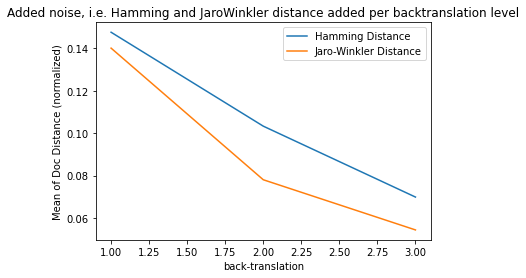

In [12]:
# line 1 points
x1 = [1,2,3]
y1 = [.147518,.103287,.069894]
# plotting the line 1 points 
plt.plot(x1, y1, label = "Hamming Distance")
# line 2 points
x2 = [1,2,3]
y2 = [.140037,.078046,.054413]
# plotting the line 2 points 
plt.plot(x2, y2, label = "Jaro-Winkler Distance")
plt.xlabel('back-translation')
# Set the y axis label of the current axis.
plt.ylabel('Mean of Doc Distance (normalized)')
# Set a title of the current axes.
plt.title('Added noise, i.e. Hamming and JaroWinkler distance added per backtranslation level')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

2. Lexical distanced plotted (method 2: total (absolute) noise per backtranslation level)

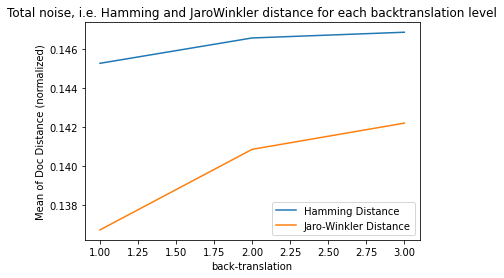

In [13]:
# line 1 points
x1 = [1,2,3]
y1 = [.145269,.146567,.146860]
# plotting the line 1 points 
plt.plot(x1, y1, label = "Hamming Distance")
# line 2 points
x2 = [1,2,3]
y2 = [.136735,.140863,.142204]
# plotting the line 2 points 
plt.plot(x2, y2, label = "Jaro-Winkler Distance")
plt.xlabel('back-translation')
# Set the y axis label of the current axis.
plt.ylabel('Mean of Doc Distance (normalized)')
# Set a title of the current axes.
plt.title('Total noise, i.e. Hamming and JaroWinkler distance for each backtranslation level')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()